# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()
#df.info()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [3]:
df.columns = df.columns.str.lower().str.replace(' ','')
#df.columns = [x.lower() for x in df.columns]
df.head()
#df.columns

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [4]:
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [5]:
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [6]:
#df.num_lines.unique()
df['num_lines'] = df.linename.map(lambda x: len(x))
df = df.sort_values(by='num_lines', ascending=False)
df.head()
#df.num_lines.unique()
# each station should have a dict of stations: counts

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


## Write a function to clean a column name.

In [7]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned
# col_name.replace() - removes all white spaces

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [9]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [10]:
#df.info()
df.date = pd.to_datetime(df.date)
df['day'] = df.date.dt.day_name()
#df.head()
#df.plot(kind='bar',x='day',y='entries')

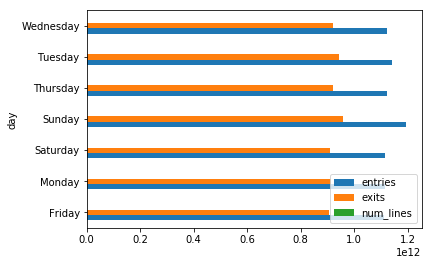

In [12]:
#df.groupby('day')['entries'].sum().plot(kind='bar')
df.groupby('day').sum().plot(kind='barh')
plt.show()

In [21]:
df.date.dt.day?

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [17]:
grouped = df.reset_index()
grouped.head()

,index,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines,day
0,132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
1,2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2,2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
3,2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
4,2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday


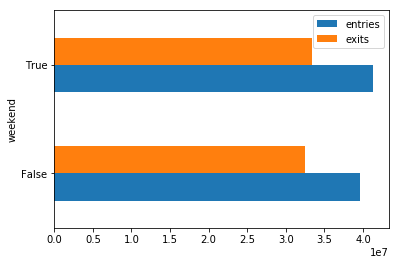

In [29]:
grouped['weekend'] = grouped.day.map(lambda day: day == 'Sunday' or day == 'Saturday')
grouped.head()
wkend = grouped.groupby('weekend').mean()
wkend[['entries', 'exits']].plot(kind='barh')

In [ ]:
# Daily traffic is approximately equal on weekend days and week days. 

# Drop a couple of columns

In [30]:
df = df.drop(['c/a', 'scp'], axis=1)
#df = df.drop('scp', axis=1)
df.head()

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2673,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
2674,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
2675,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday
